[[0.6889 0.1909]
 [0.1909 0.1058]]


<Axes: >

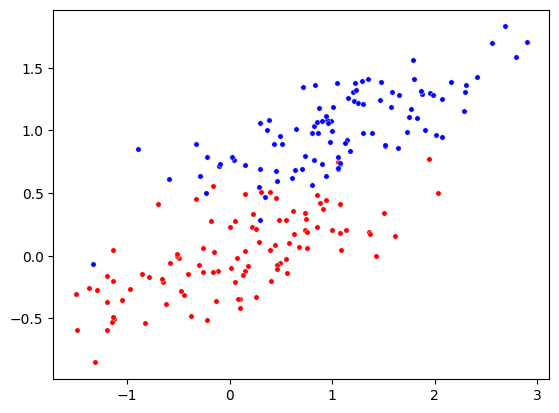

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

tam = 100

C = np.array([[0, -0.23],[0.83, 0.23]])

mu1 = (0,0)
mu2 = (1,1)

cov = C.T @ C

print(cov)

#Aca genero las caracteristicas, que son 2 por variable aleatoria.
#Creo que la idea de usar 2 distribuciones distintas, es simular que las caracteristicas vienen
#de 2 clases distintas. Por ejemplo la primera distribucion podria representar caracteristicas
#que vienen del salmon, y la segunda que vienen de meros.

data1 = np.random.multivariate_normal(mu1, cov, tam)

x1 = data1[:, 0]
y1 = data1[:, 1]

data2 = np.random.multivariate_normal(mu2, cov, tam)

x2 = data2[:, 0]
y2 = data2[:, 1]

sns.scatterplot(x=x1, y=y1, color="r", s=15)
sns.scatterplot(x=x2, y=y2, color="b", s=15)

In [ ]:
# 7.b
# Se pide implementar un clasificador de las 2 categorias usando solamente la primera caracteristica.

train1 = x1[:int((tam-1)*0.8)] # obtengo la primera porcion que representa el 80%
test1 = x1[int((tam-1)*0.8):] #  porcion del 20%

train2 = x2[:int((tam-1)*0.8)]
test2 = x2[int((tam-1)*0.8):]


#Estimo los parametros a usar en la clasificacion, esto es entrenamiento (?

mean1 = np.mean(train1)
sigma1 = np.std(train1)

print(mean1, sigma1)

mean2 = np.mean(train2)
sigma2 = np.std(train2)

print(mean2, sigma2)


0.054335259954535454 0.8161134654317985
1.117651661626616 0.7122423590698413


In [ ]:
 # Implementacion del clasificador de una sola caracteristica asumiendo p(w1) = p(w2)

def classify(x):
  if np.log(sigma1)+(((x-mean1)/sigma1)**2)/2 < np.log(sigma2)+(((x-mean2)/sigma2)**2)/2:
    return 1
  else:
    return 2

# Ahora veo como me va en el conjunto de testeo
# El error empirico es cant_error / tam_test

error = 0

# Veo que clasifica para cada caracteristica de test1 que es de la clase 1
pred1 = list(map(lambda j: classify(test1[j]), list(range(0, len(test1)))))
print(pred1)
error += pred1.count(2) #veces que predijo 2, osea predijo mal porque la etiqueta es 1
print(error)
# Veo que clasifica para cada caracteristica de test2 que es de la clase 2
pred2 = list(map(lambda j: classify(test2[j]), list(range(0, len(test2)))))
print(pred2)
error += pred2.count(1) #veces que predijo 1, osea predijo mal porque la etiqueta es 2
print(error)
error = error / (len(pred1) + len(pred2))
print(error)


[1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1]
6
[2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2]
12
0.2857142857142857


<Axes: >

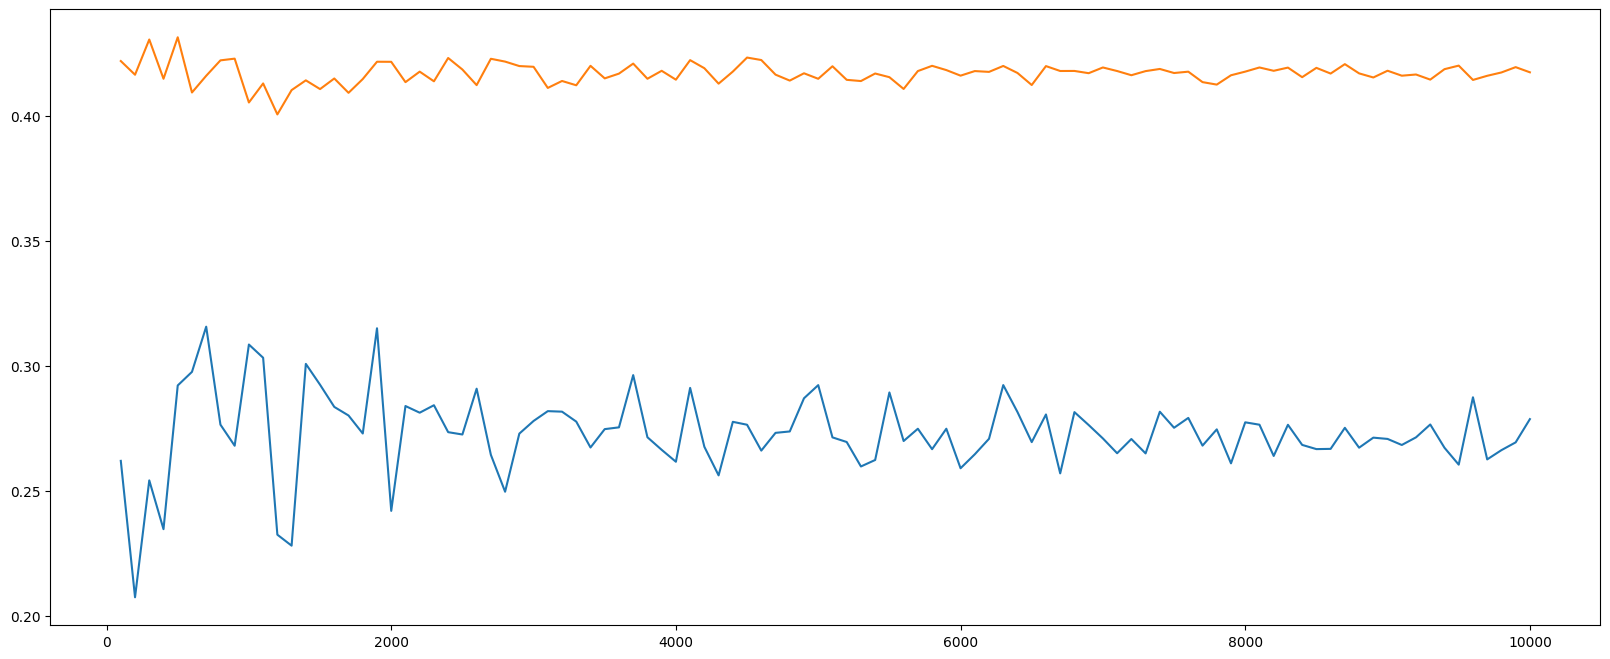

In [ ]:
# Pruebo aumentando el tamaño de muestra

error_change = []

for tam1 in range(100, 10001, 100):

  dataa1 = np.random.multivariate_normal(mu1, cov, tam1)
  x1 = dataa1[:, 0]
  dataa2 = np.random.multivariate_normal(mu2, cov, tam1)
  x2 = dataa2[:, 0]
  train1 = x1[:int((tam1-1)*0.8)]
  test1 = x1[int((tam1-1)*0.8):]
  train2 = x2[:int((tam1-1)*0.8)]
  test2 = x2[int((tam1-1)*0.8):]
  mean1 = np.mean(train1)
  sigma1 = np.std(train1)
  mean2 = np.mean(train2)
  sigma2 = np.std(train2)

  error = 0
  pred1 = list(map(lambda j: classify(test1[j]), list(range(0, len(test1)))))
  error += pred1.count(2)
  pred2 = list(map(lambda j: classify(test2[j]), list(range(0, len(test2)))))
  error += pred2.count(1)
  error = error / (len(pred1) + len(pred2))

  #cota bhattacharyya
  a = (((sigma1**2)+(sigma2**2))/2)
  B = (((mean1 - mean2)**2)/(8*a))+np.log(a/np.sqrt((sigma1**2)*(sigma2**2)))/2
  cota = np.exp(-B)/2

  error_change.append([tam1, error, cota])

plt.figure(figsize=(20,8))

# error
sns.lineplot(x=np.array(error_change)[:,0], y=np.array(error_change)[:,1])

#cota
sns.lineplot(x=np.array(error_change)[:,0], y=np.array(error_change)[:,2])

In [ ]:
# 7.e
# Usamos la Regla de Clasificación Bayesiana, nomas que ahora la distribucion es normal bivariada.


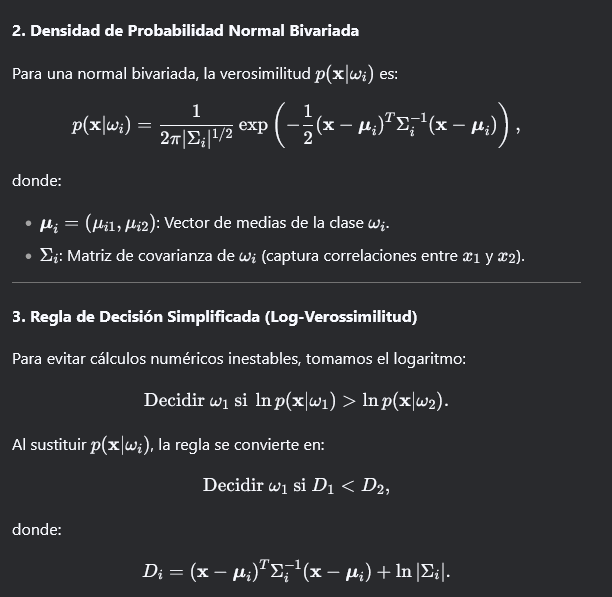

In [ ]:
train1 = data1[:int((tam-1)*0.8)] # obtengo la primera porcion que representa el 80%
test1 = data1[int((tam-1)*0.8):] #  porcion del 20%

train2 = data2[:int((tam-1)*0.8)]
test2 = data2[int((tam-1)*0.8):]


#Estimo los parametros a usar en la clasificacion, esto es entrenamiento (?

mean1 = np.mean(train1, axis=0)
sigma1 = np.std(train1, axis=0)

print(mean1, sigma1)

mean2 = np.mean(train2, axis=0)
sigma2 = np.std(train2, axis=0)

print(mean2, sigma2)

[0.05433526 0.00629829] [0.81611347 0.33732509]
[1.11765166 1.02970008] [0.71224236 0.3047404 ]


In [1]:
from numpy.linalg import inv

def classify2(x):
  if (x-mean1).transpose() @ inv(cov) @ (x-mean1) < (x-mean2).transpose() @ inv(cov) @ (x-mean2):
    return 1
  else:
    return 2

# Ahora veo como me va en el conjunto de testeo
# El error empirico es cant_error / tam_test

error = 0

# Veo que clasifica para cada caracteristica de test1 que es de la clase 1
pred1 = list(map(lambda j: classify2(test1[j]), list(range(0, len(test1)))))
print(pred1)
error += pred1.count(2) #veces que predijo 2, osea predijo mal porque la etiqueta es 1
print(error)
# Veo que clasifica para cada caracteristica de test2 que es de la clase 2
pred2 = list(map(lambda j: classify2(test2[j]), list(range(0, len(test2)))))
print(pred2)
error += pred2.count(1) #veces que predijo 1, osea predijo mal porque la etiqueta es 2
print(error)
error = error / (len(pred1) + len(pred2))
print(error)

NameError: name 'test1' is not defined

In [10]:
#Ejercicio 8

import numpy as np
from scipy.stats import poisson

# Parámetros
lambda1, lambda2 = 1.8, 0.4
n_samples = 1000

# Generar datos
X_omega1 = poisson.rvs(lambda1, size=n_samples//2)
X_omega2 = poisson.rvs(lambda2, size=n_samples//2)
X = np.concatenate([X_omega1, X_omega2])
y_true = np.array([1] * (n_samples//2) + [2] * (n_samples//2))  # 0: ω1, 1: ω2


# Regla de Bayes
tau = (lambda1 - lambda2) / (np.log(lambda1) - np.log(lambda2))

def predecir(x):
  if x > tau:
    return 1
  else:
    return 2

predicciones = list(map(lambda i: predecir(X[i]), list(range(0, n_samples))))

# Error empírico
cant_errores = list(np.add(y_true, predicciones)).count(3) #contamos la cantidad de 3's. Osea donde se equivoco, ya que si acerto 1+1=2 ó 2+2=4, pero si error solo sucede 1+2 = 2+1 = 3
print(f"Predicciones erroneas: {cant_errores}")
print(f"Error empírico: {cant_errores/n_samples}")

Predicciones erroneas: 245
Error empírico: 0.245
